### Bank Note Authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

In [1]:
##Dataset Link: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'C:\Users\mohd ashfaq\Downloads\BankNote_Authentication.csv')

In [3]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### EDA

In [6]:
print(df.describe())


          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


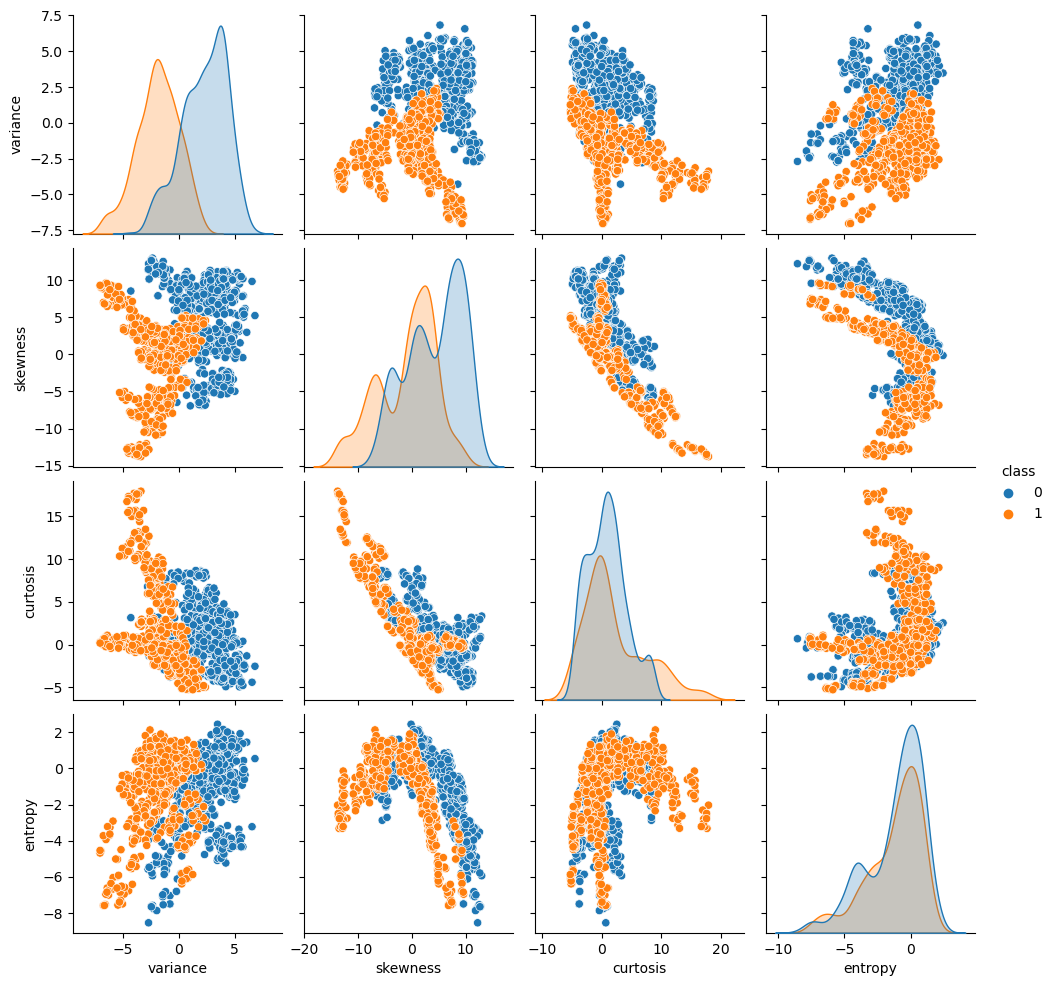

In [7]:
sns.pairplot(df, hue='class')
plt.show()


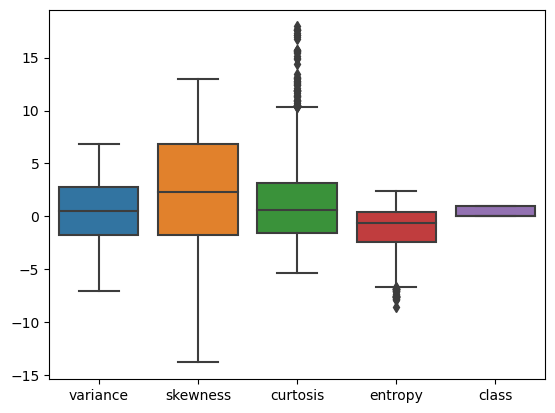

In [8]:
# Boxplot for each feature
sns.boxplot(data=df)
plt.show()


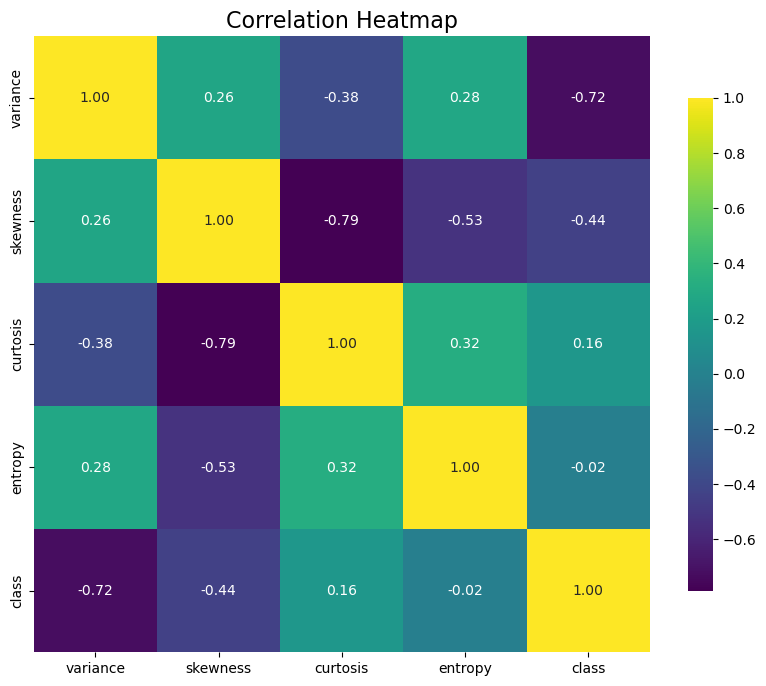

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Generate the correlation matrix
correlation_matrix = df.corr()

# Set up the Matplotlib figure
plt.figure(figsize=(10, 8))

# Define a custom color palette ('viridis')
custom_palette = sns.color_palette("viridis", as_cmap=True)

# Create a heatmap with the custom color palette
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f',  # Format annotation to 2 decimal places
            cmap=custom_palette,  # Use the custom color palette
            square=True, 
            cbar=True, 
            cbar_kws={'shrink': 0.8},  # Adjust colorbar size
            annot_kws={'size': 10})  # Adjust annotation text size

# Set the title
plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
plt.show()


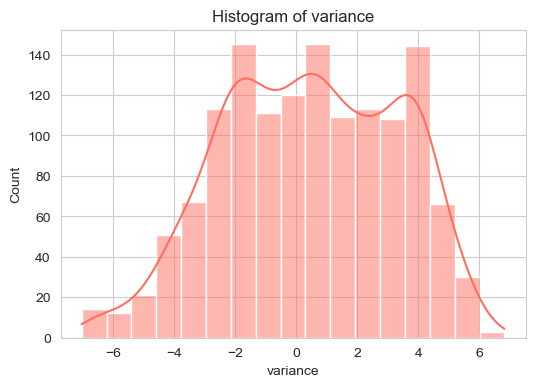

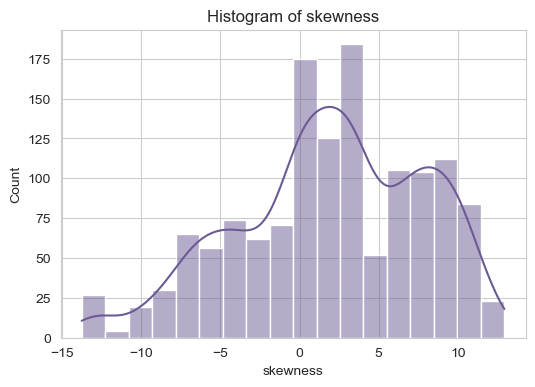

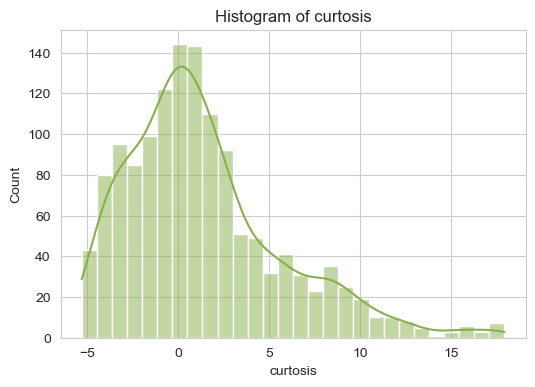

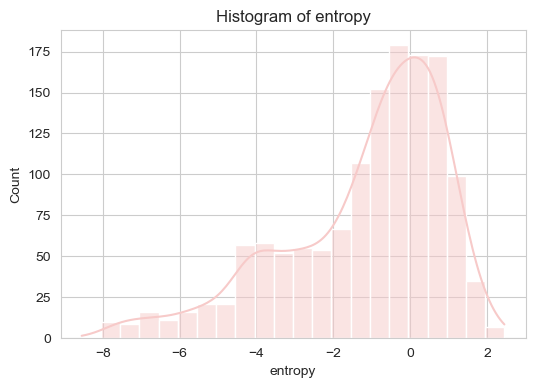

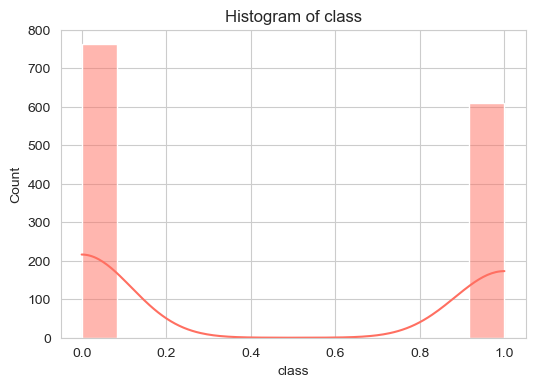

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'df'
# If not, load your data into a DataFrame

# Set a custom color palette
custom_palette = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9']

# Plot histograms for each feature with the custom color palette
for i, column in enumerate(df.columns):
    color = custom_palette[i % len(custom_palette)]  # Cycle through colors
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True, color=color)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


C:\Users\mohd ashfaq\AppData\Local\Temp\ipykernel_7412\3992370806.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['skewness'], shade=True, color='purple')


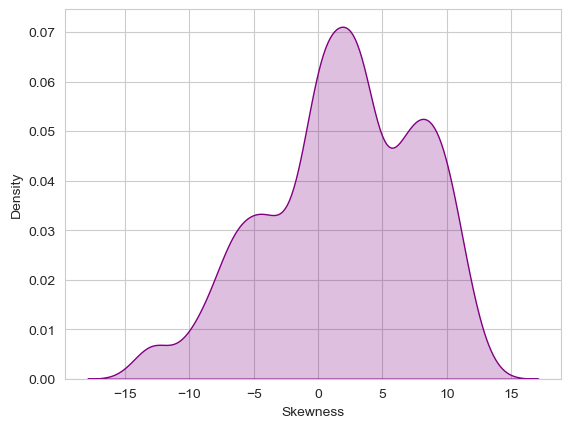

In [15]:
# KDE plot for feature distribution
sns.kdeplot(df['skewness'], shade=True, color='purple')
plt.xlabel('Skewness')
plt.ylabel('Density')
plt.show()


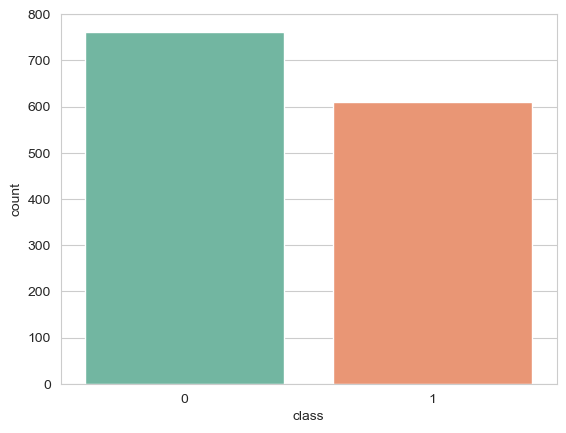

In [16]:
# Count plot for class distribution
sns.countplot(x='class', data=df, palette='Set2')
plt.show()


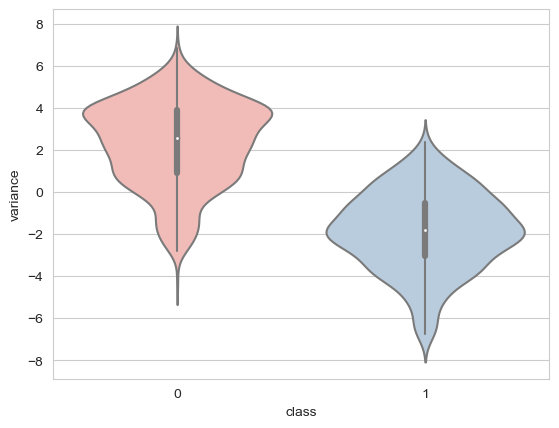

In [17]:
# Violin plot for feature distributions
sns.violinplot(x='class', y='variance', data=df, palette='Pastel1')
plt.show()


C:\Users\mohd ashfaq\anaconda3\lib\site-packages\seaborn\distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\mohd ashfaq\anaconda3\lib\site-packages\seaborn\distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\mohd ashfaq\anaconda3\lib\site-packages\seaborn\distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\mohd ashfaq\anaconda3\lib\site-packages\seaborn\distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\mohd ashfaq\anaconda3\lib\site-packages\seaborn\distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\mohd ashfaq\anaconda3\lib\site-packages\seaborn\distributions.py:1138: UserWarning: cmap parameter ignored when using hue

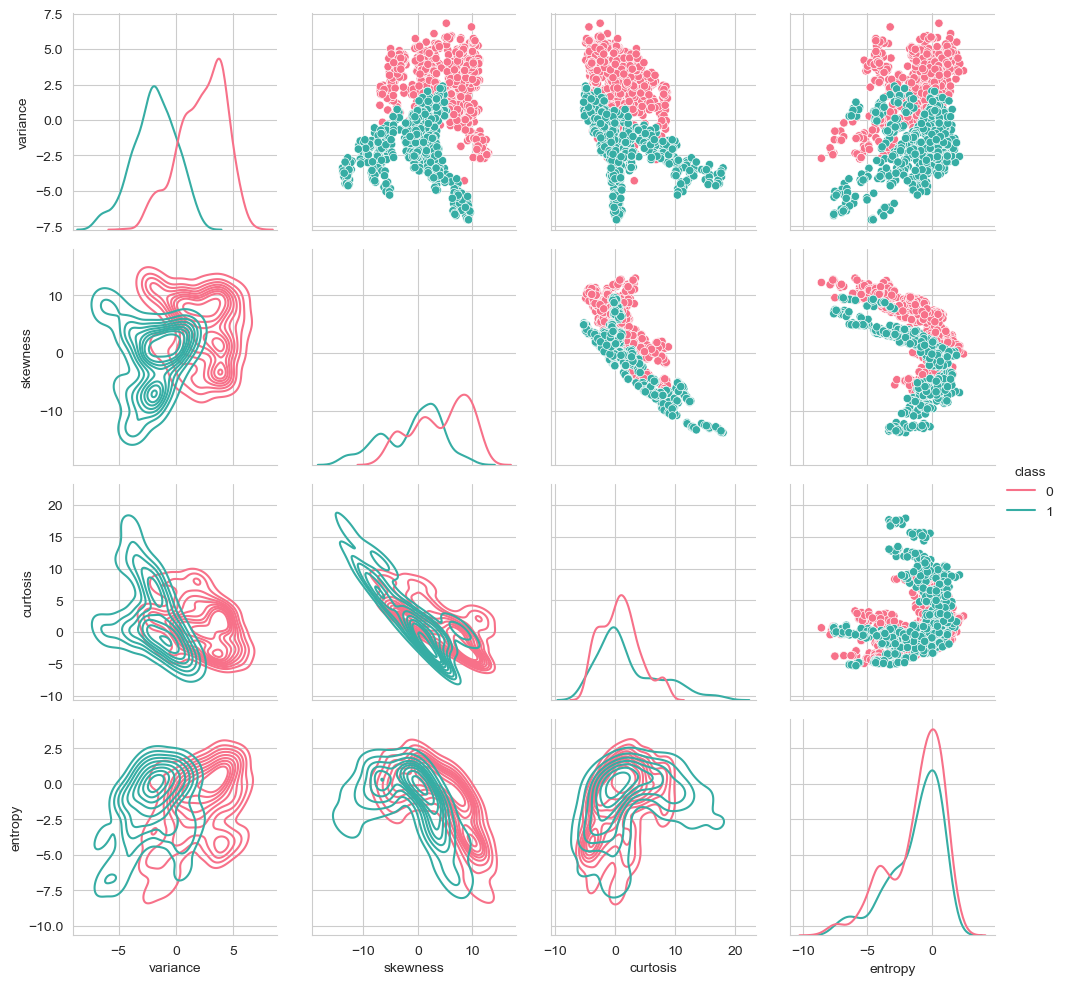

In [22]:
# PairGrid to create a grid of multiple plots
g = sns.PairGrid(df, hue='class', palette='husl')
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.add_legend()
plt.show()


In [26]:
df.isnull()

,variance,skewness,curtosis,entropy,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1367,False,False,False,False,False
1368,False,False,False,False,False
1369,False,False,False,False,False
1370,False,False,False,False,False


### Independent and Dependent features


In [27]:

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [28]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [30]:
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
## Prediction
y_pred=classifier.predict(X_test)

In [32]:
### Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [33]:
score

0.9878640776699029

In [37]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [35]:
import numpy as np

In [36]:
classifier.predict([[2,3,4,1]])

C:\Users\mohd ashfaq\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)